In [1]:
##libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



In [2]:
#Loading  the data
df=pd.read_csv('train.csv')
df.head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
df.drop('id', axis=1, inplace=True)

## **Data Visualization**

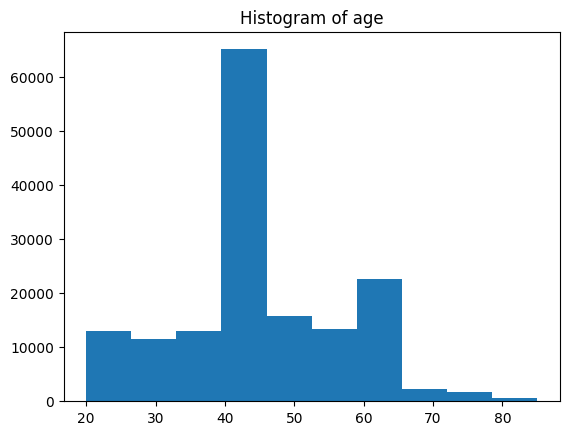

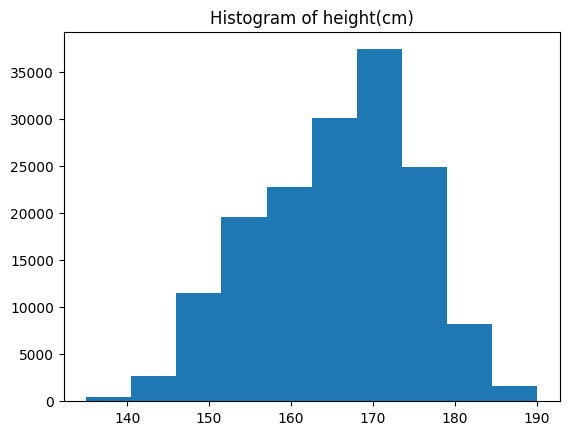

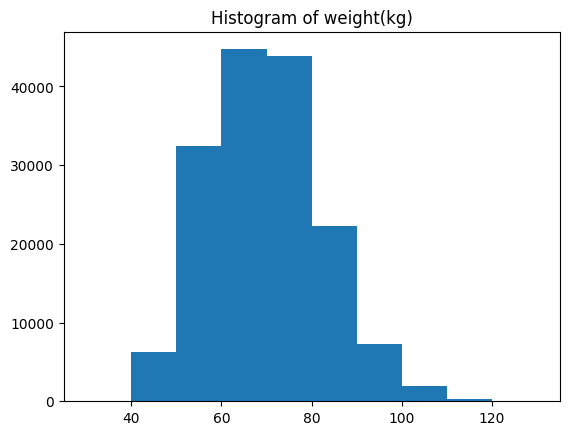

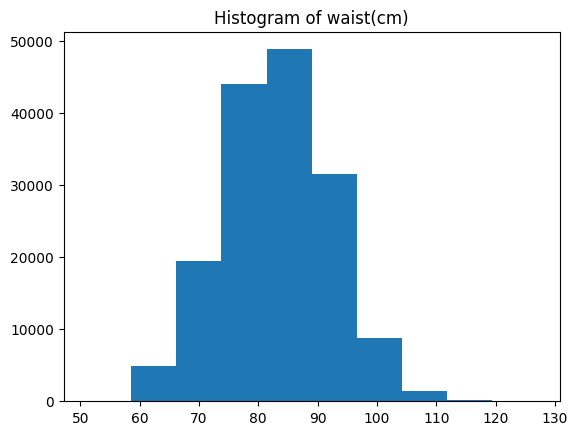

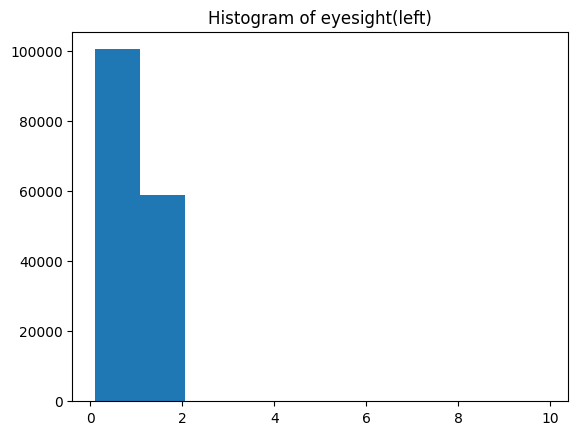

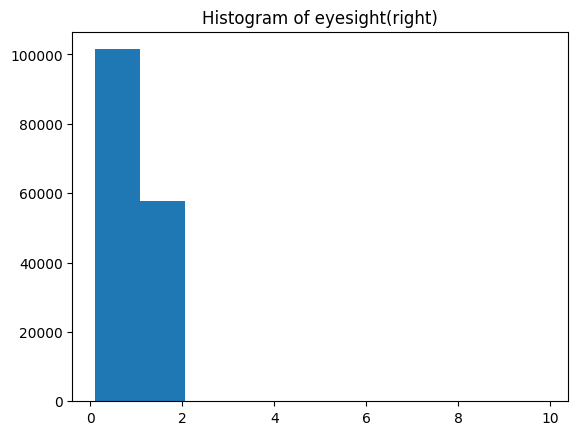

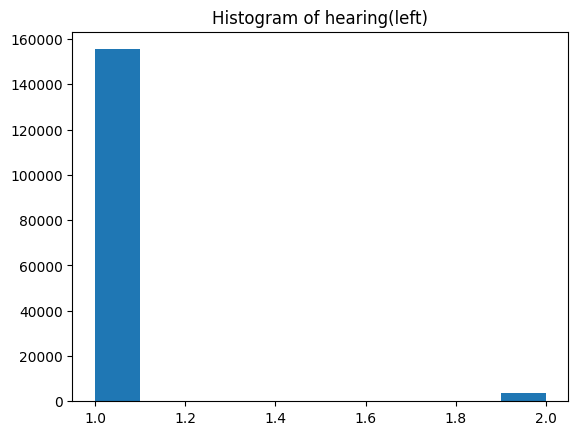

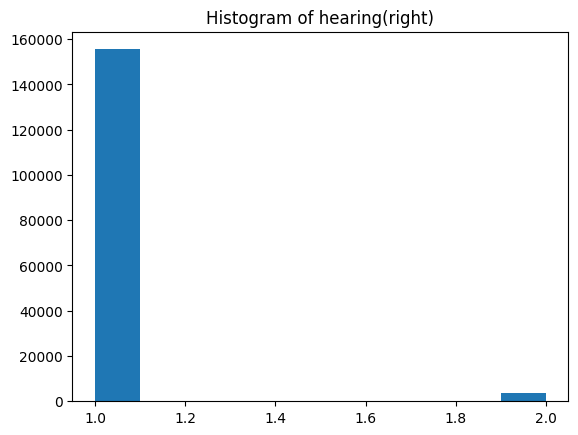

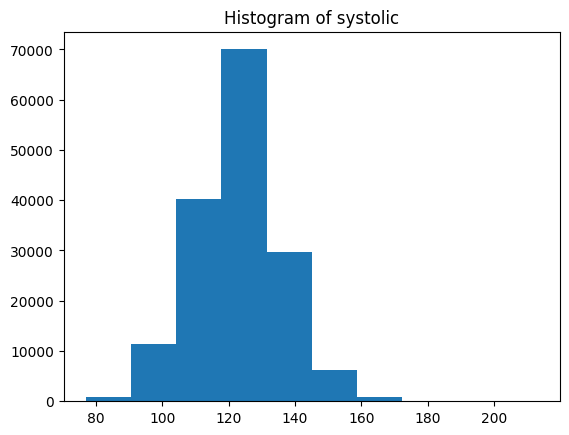

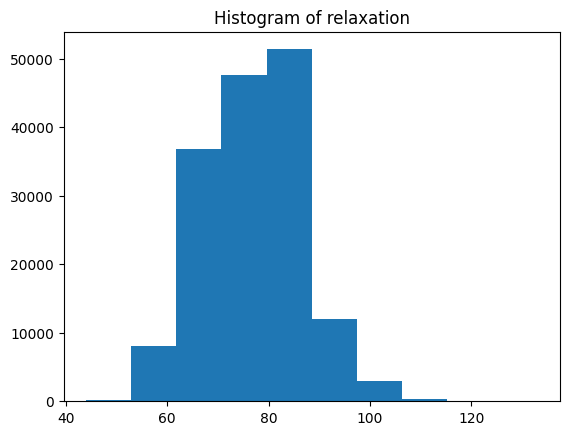

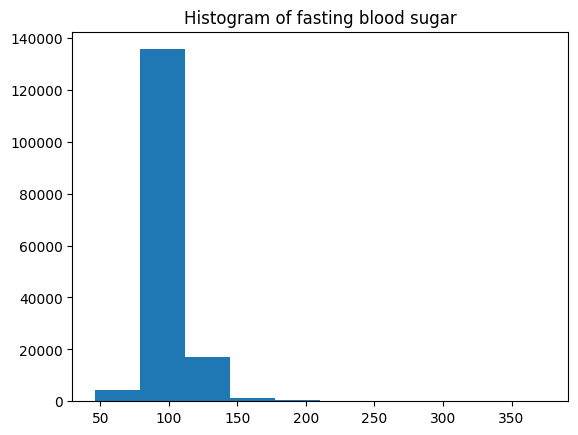

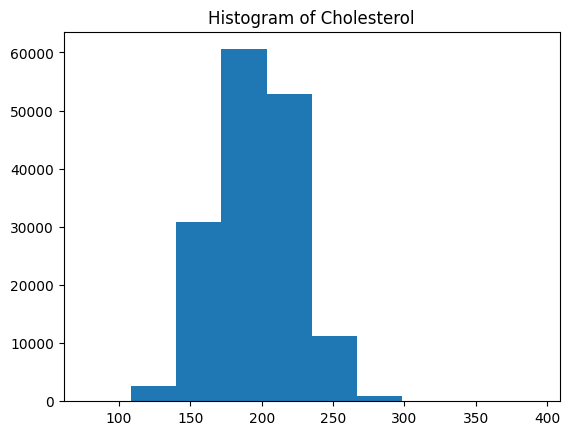

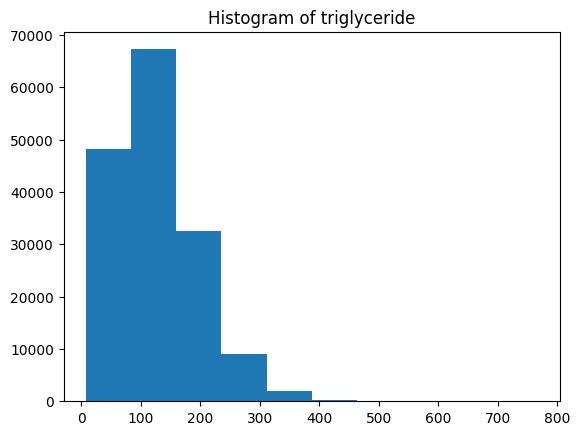

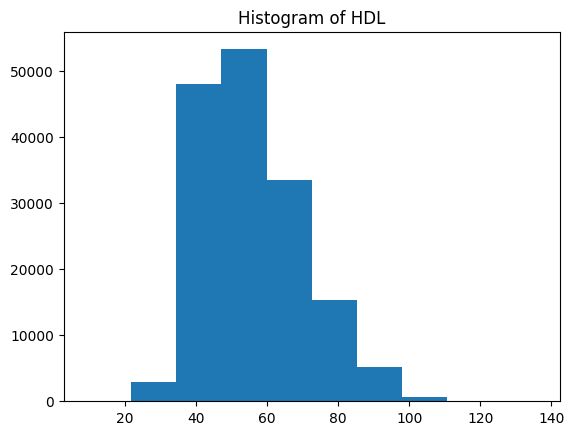

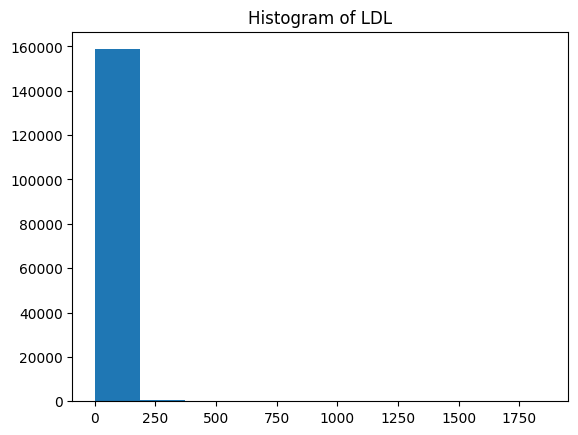

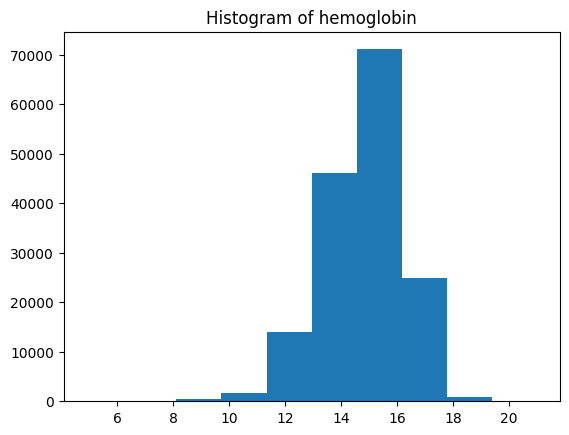

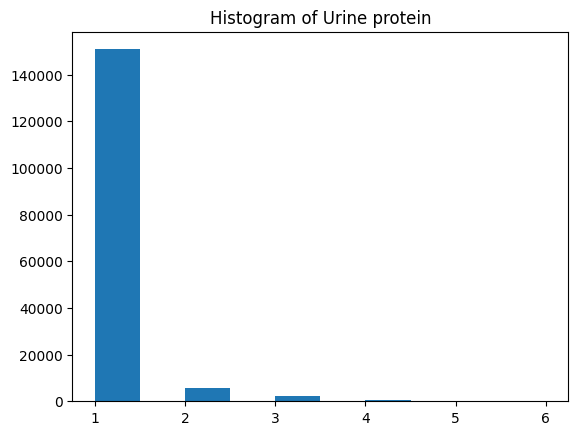

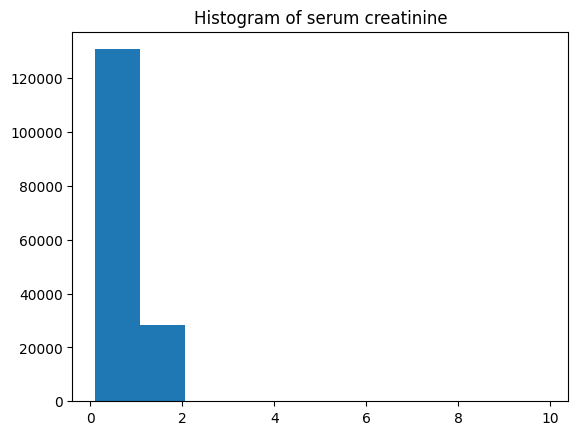

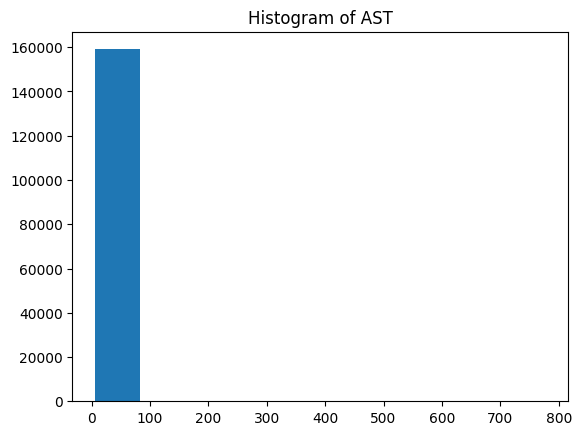

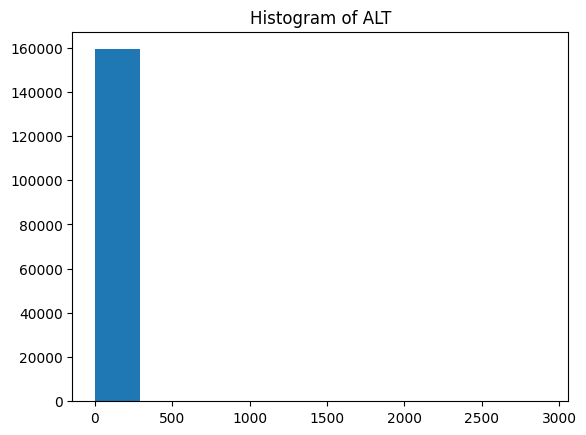

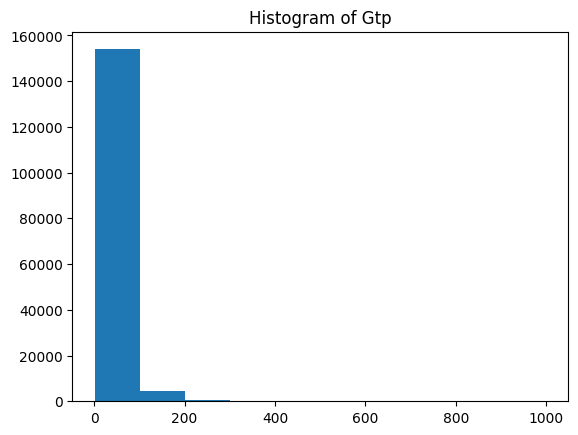

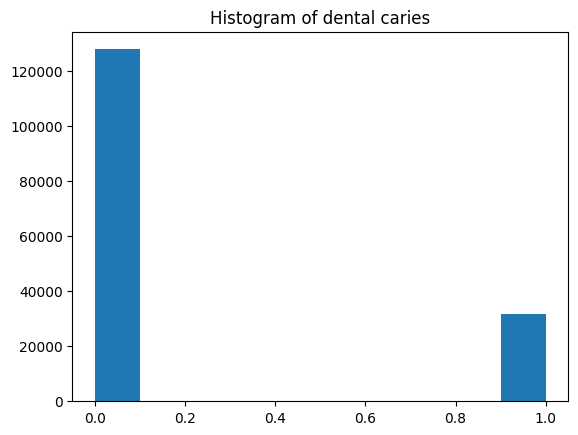

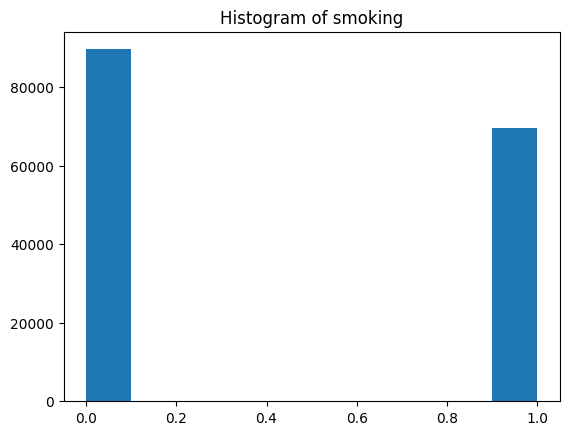

In [4]:
#Histogram of the numeric columns
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Create a histogram for each numeric column
for col in numeric_columns:
    plt.hist(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()

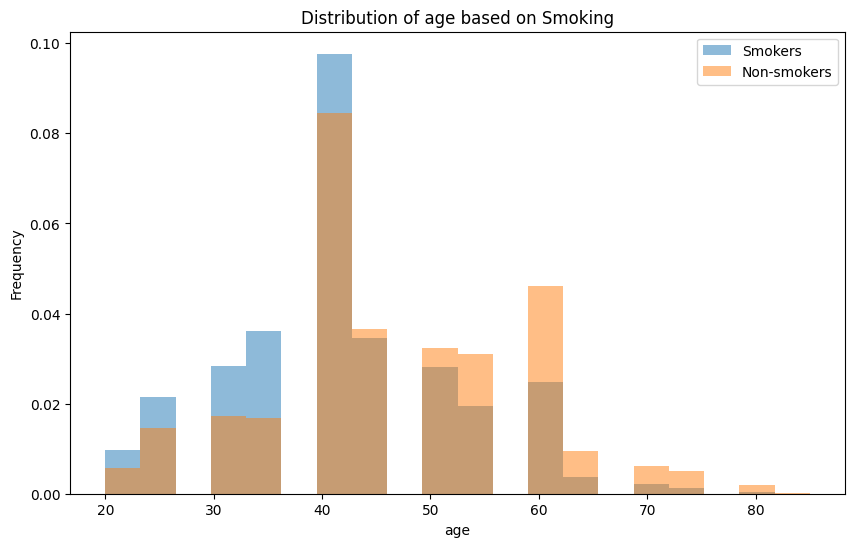

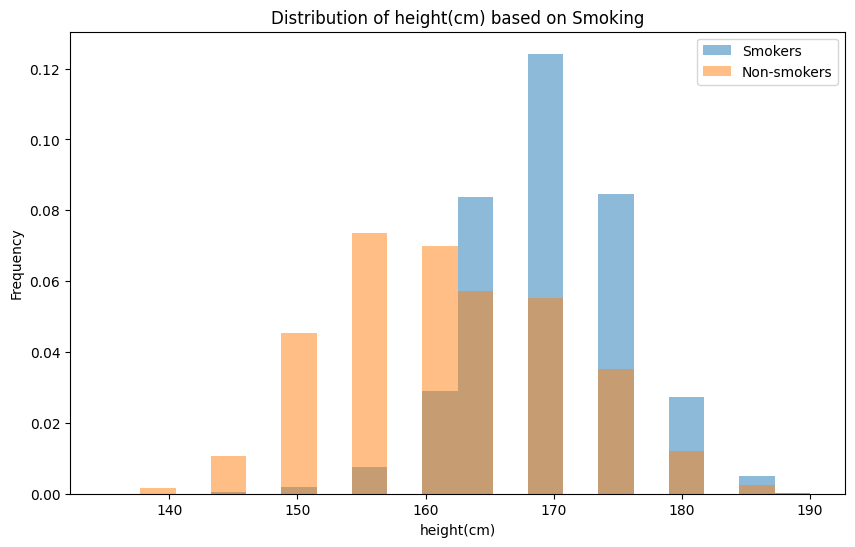

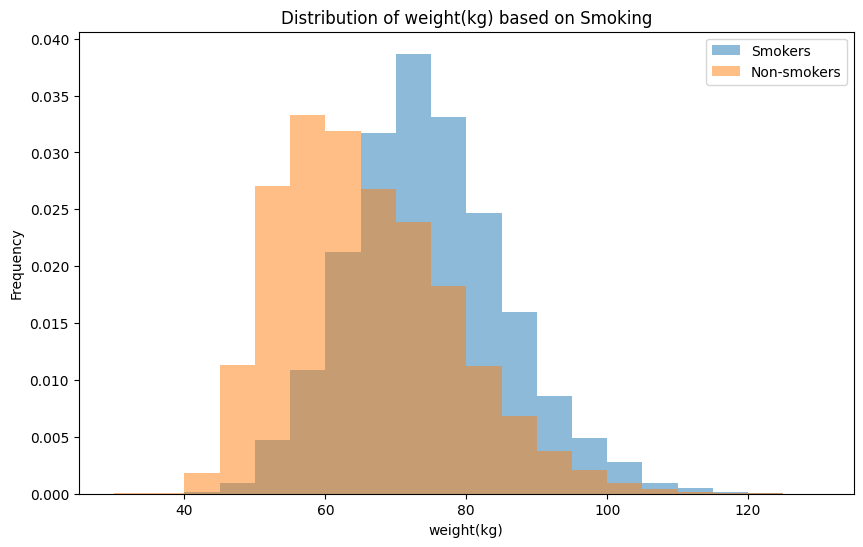

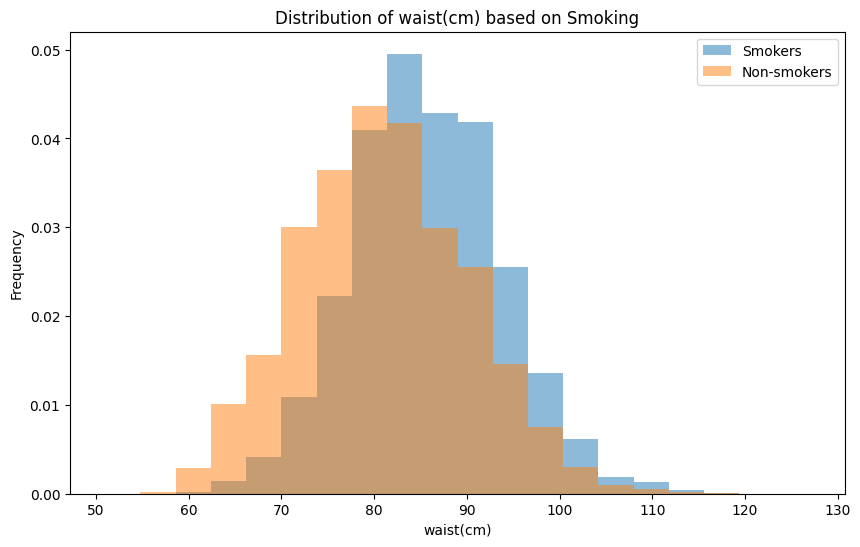

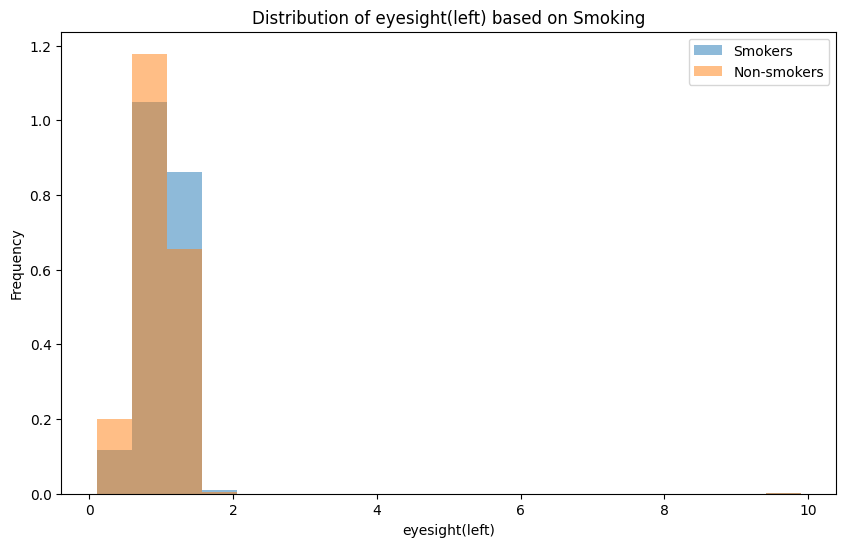

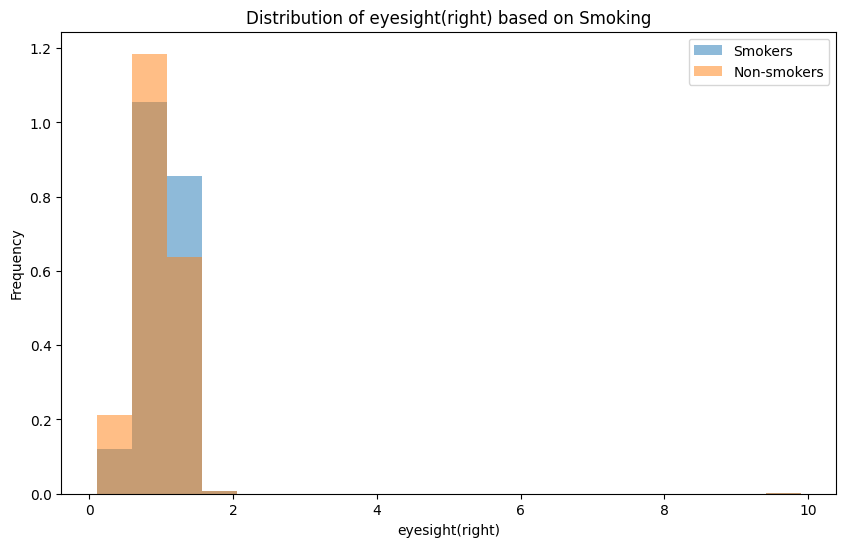

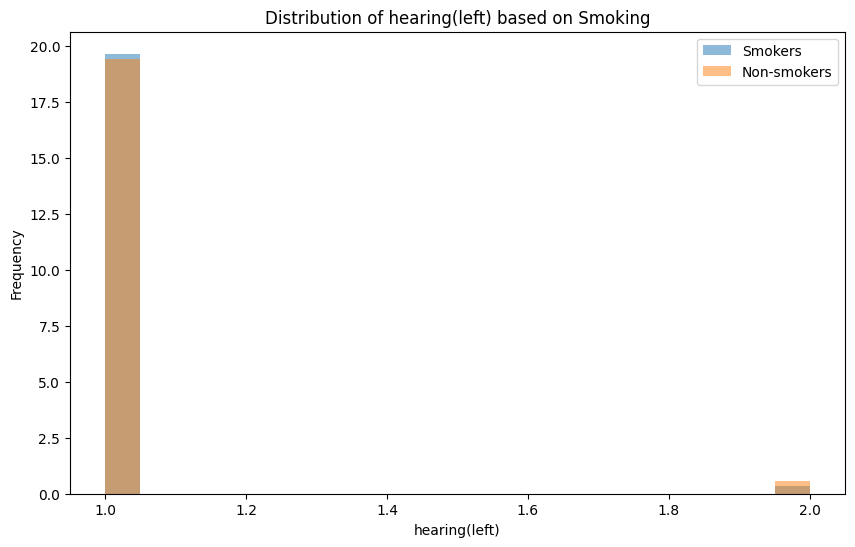

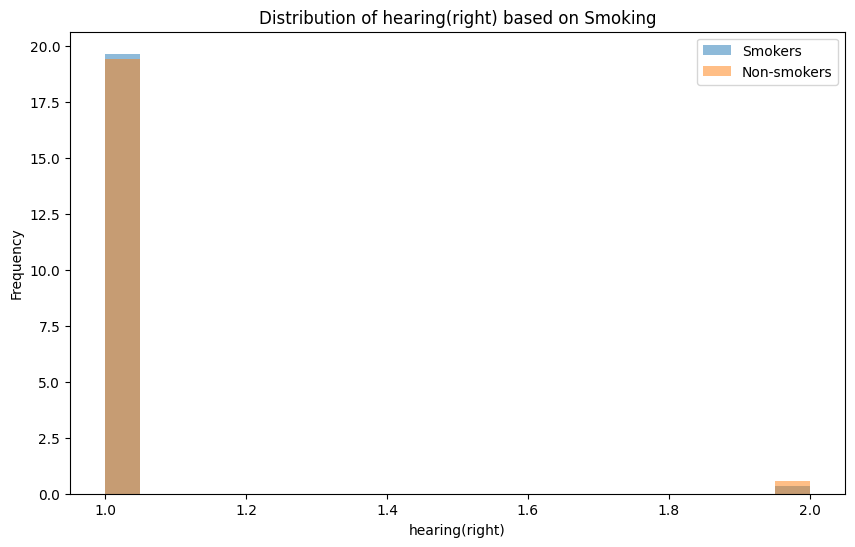

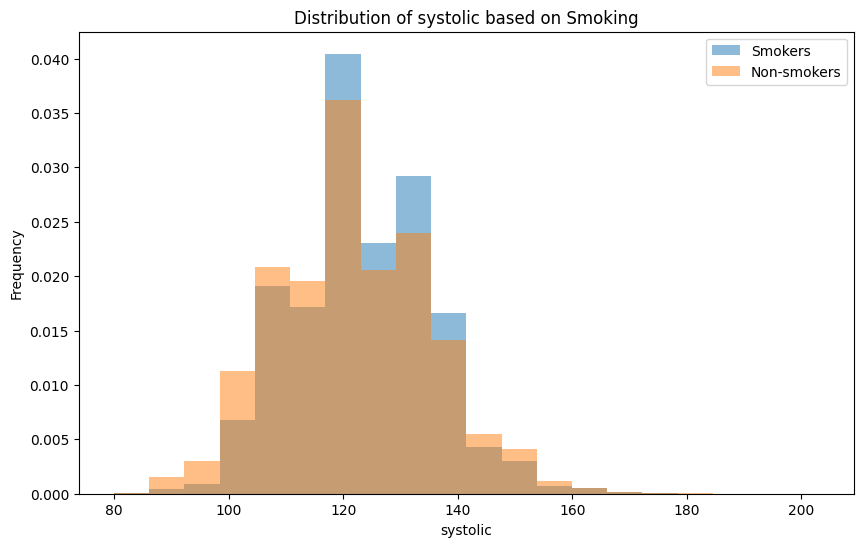

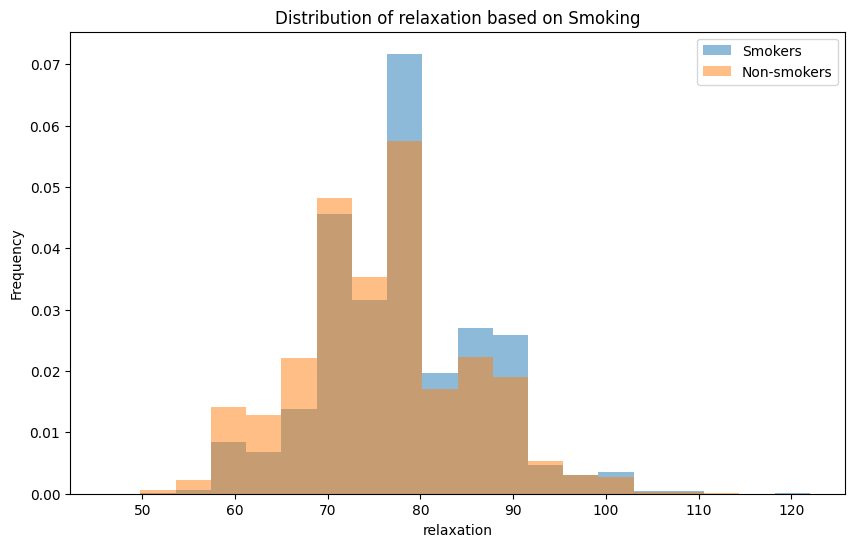

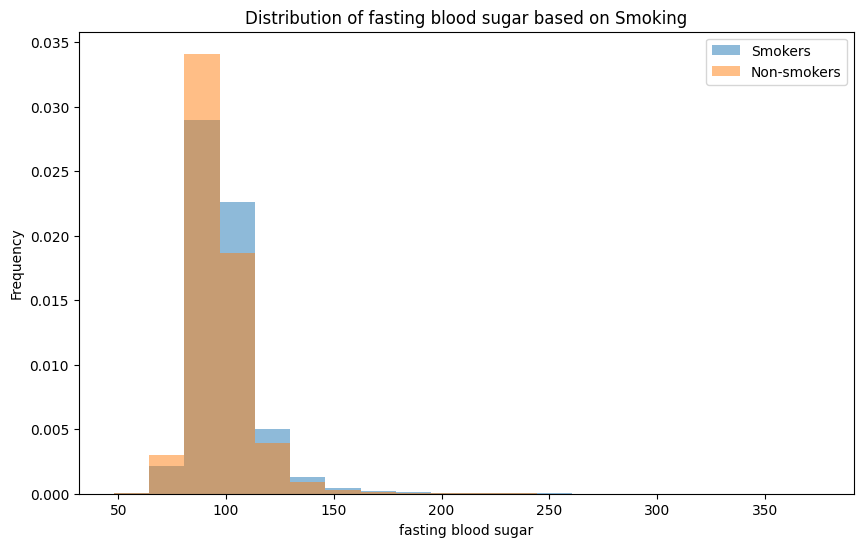

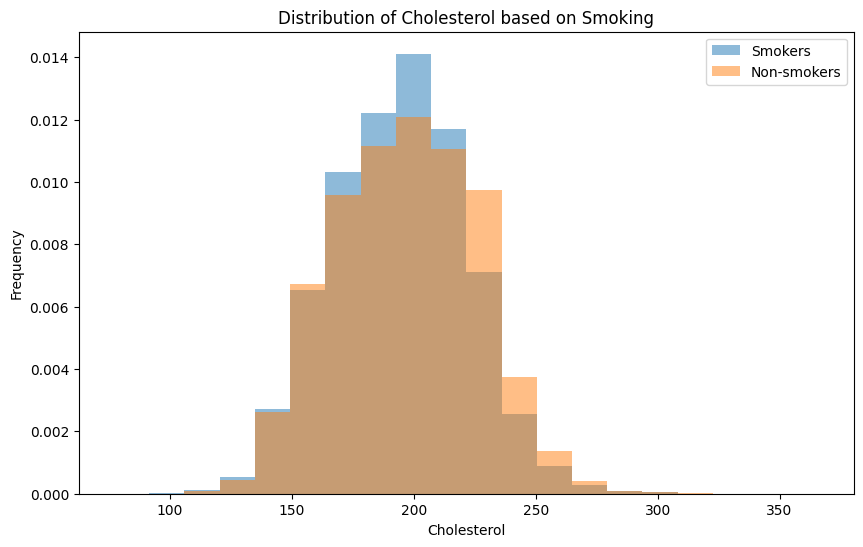

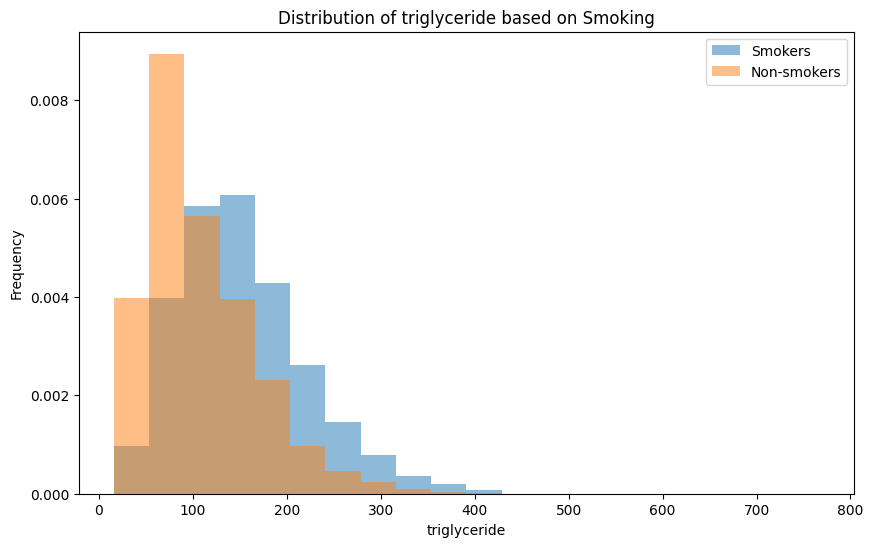

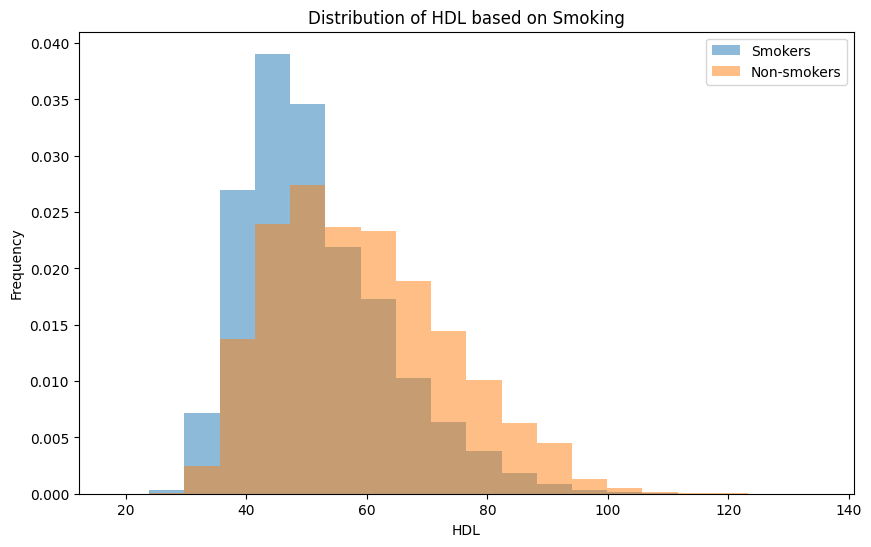

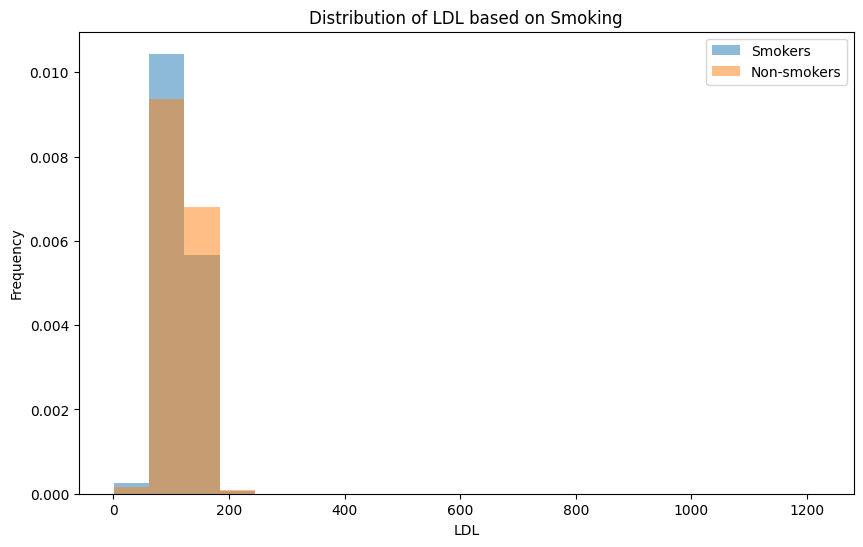

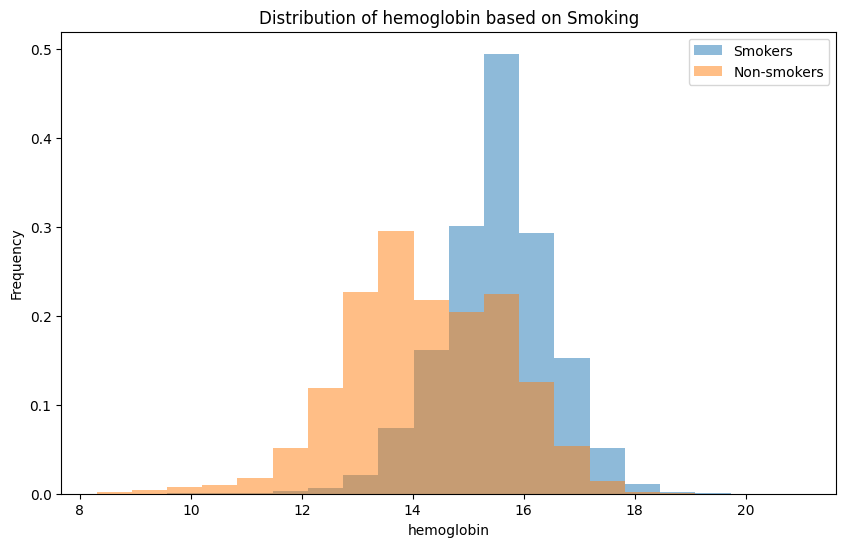

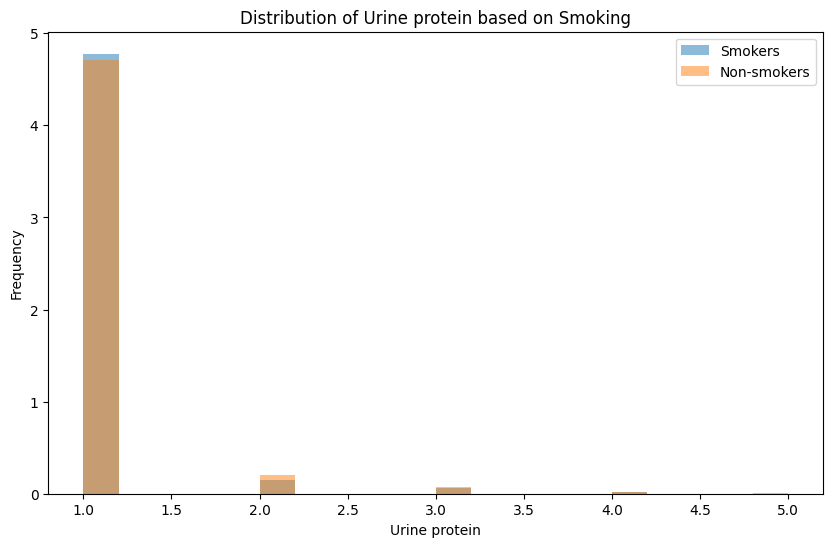

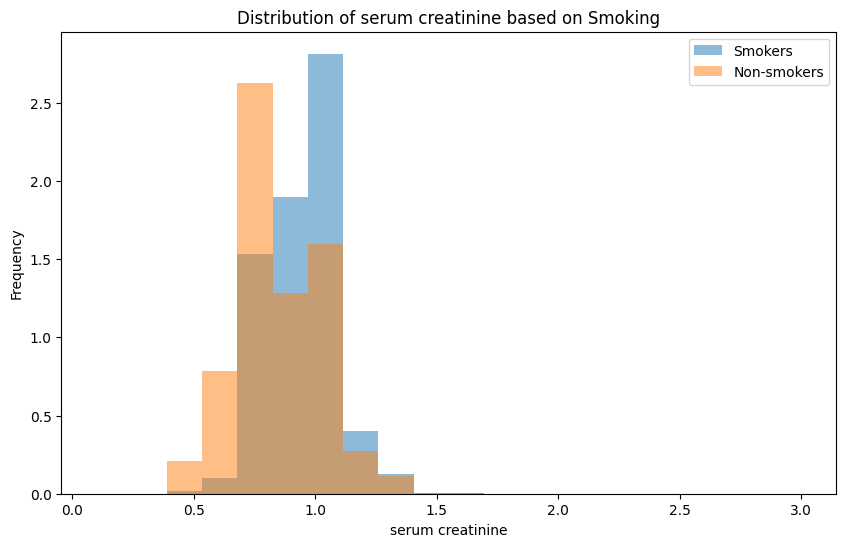

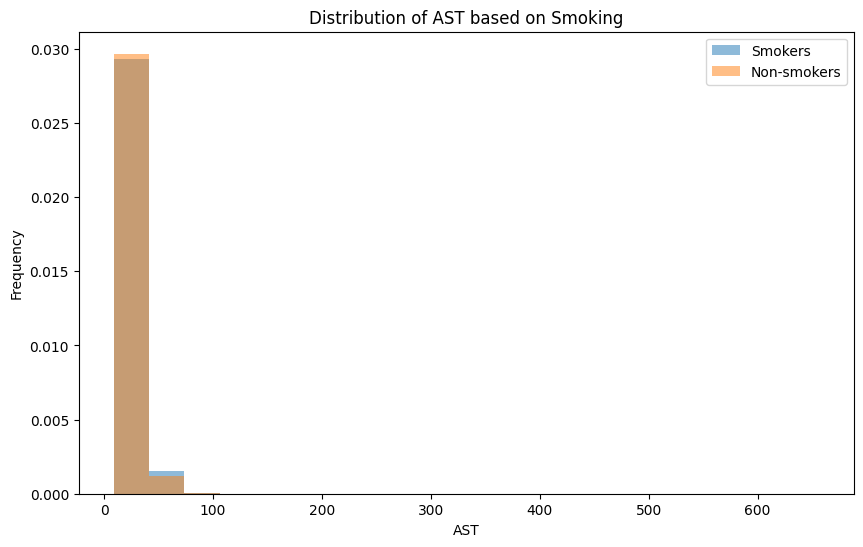

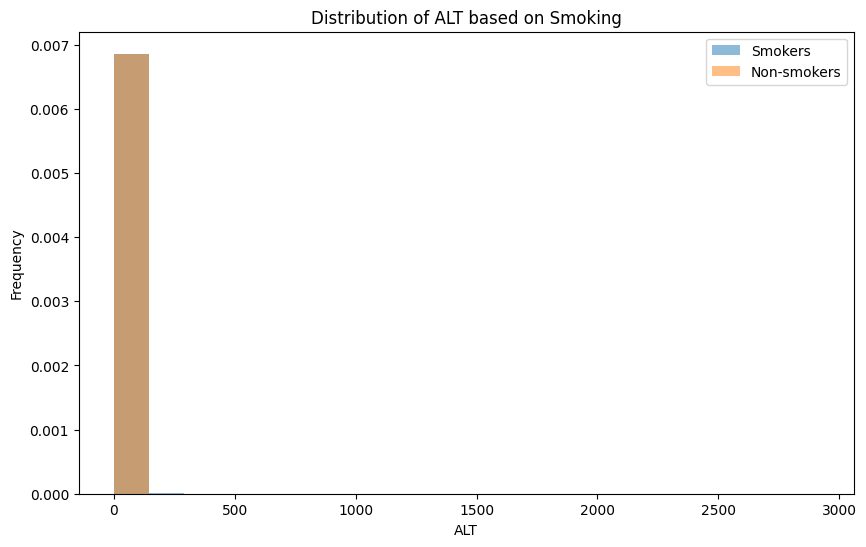

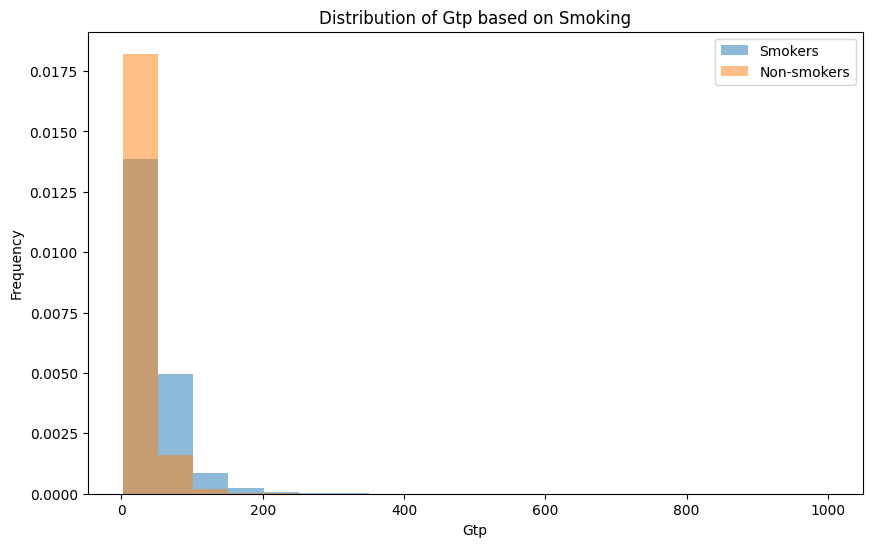

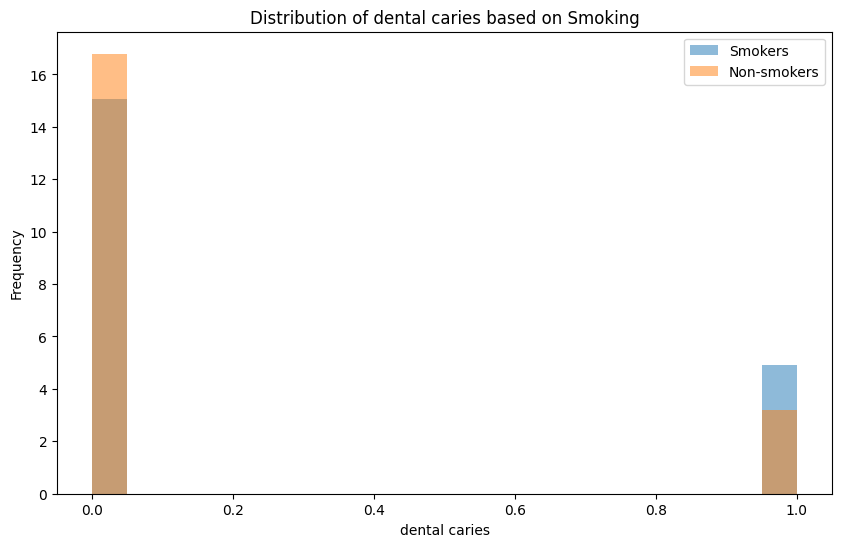

In [5]:
# Create separate dataframes for smokers and non-smokers to see the distribution of the variables

smokers_data = df[df['smoking'] == 1]
non_smokers_data = df[df['smoking'] == 0]

variables = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', ]

for variable in variables:
    # Create separate dataframes for different values of the target variable
    smokers_data_variable = smokers_data[variable]
    non_smokers_data_variable = non_smokers_data[variable]

    # Plot the distribution of the variable for each target variable value
    plt.figure(figsize=(10, 6))
    h,b,_=plt.hist(smokers_data_variable, bins=20, alpha=0.5, label='Smokers',density=1)
    plt.hist(non_smokers_data_variable, bins=b, alpha=0.5, label='Non-smokers', density=1)

    # Set the labels and title
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable} based on Smoking')

    # Add legend
    plt.legend()

    # Display the figure
    plt.show()


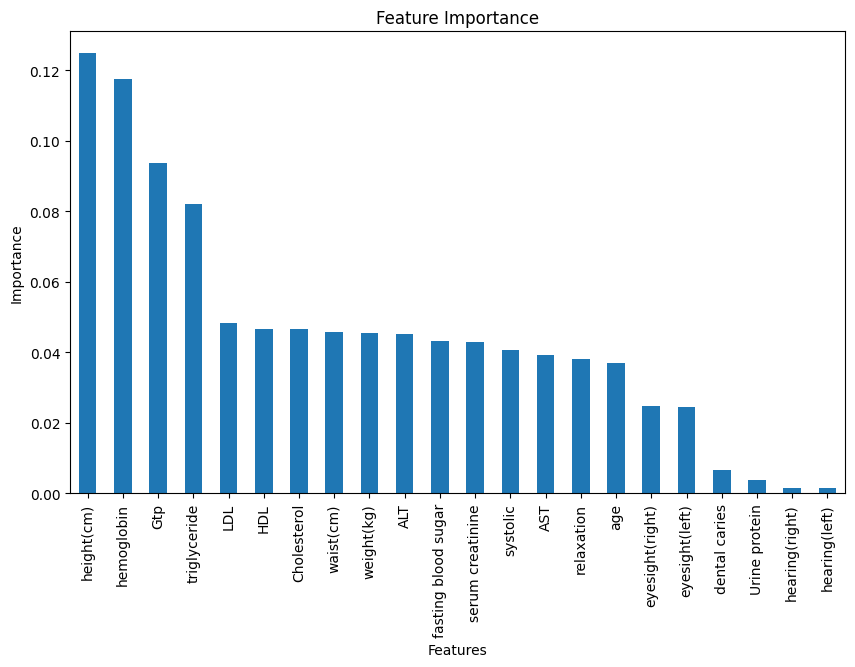

In [6]:
# The'smoking' is the target variable
X = df.drop('smoking', axis=1)
y = df['smoking']

# Initialize a RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a Series for better visualization
feature_importances = pd.Series(importances, index=X.columns)

# Sort feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()